In [1]:
# Python packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense, ReLU, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# import sklearn.metrics as skmetrics
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix

import pandas as pd
import seaborn as sns

In [2]:
import utils

In [3]:
# Load data
data = np.load('dados.npz')

# Training set
X_train = data['X_train']
y_train = data['y_train']

# Test set
X_test = data['X_test']
y_test = data['y_test']

In [4]:
# Data summary
print(f'X_train = {X_train.shape}')
print(f'y_train = {y_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_test = {y_test.shape}')

X_train = (18358, 1000, 12)
y_train = (18358, 5)
X_test = (2055, 1000, 12)
y_test = (2055, 5)


In [5]:
# Input layer
input_layer = Input(shape=X_train.shape[1:])

In [6]:
model = utils.get_model(input_layer, 'rajpurkar')

In [ ]:
model.summary()

In [7]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [25]:
callbacks = []

# filepath='C:/Users/sarah/TCC/ECG Classification Models/Weights improvement/weights-improvement-{epoch:02d}-{val_loss:.2f}.h5'

monitor = 'val_loss'

callbacks.append(ReduceLROnPlateau(monitor=monitor, factor=0.1, patience=10, min_lr=0.001/1000))
# callbacks.append(EarlyStopping(monitor=monitor, mode='auto', verbose=1, patience=10))
# callbacks.append(ModelCheckpoint(filepath, monitor=monitor, mode='auto', verbose=1, save_best_only=True))

In [ ]:
callbacks

In [26]:
#Treino do modelo
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=callbacks)

Train on 18358 samples, validate on 2055 samples
Epoch 1/50
18358/18358 [==============================] - 83s 5ms/sample - loss: 0.1977 - accuracy: 0.9188 - val_loss: 0.2819 - val_accuracy: 0.8940
Epoch 2/50
18358/18358 [==============================] - 85s 5ms/sample - loss: 0.1916 - accuracy: 0.9221 - val_loss: 0.2847 - val_accuracy: 0.8955
Epoch 3/50
18358/18358 [==============================] - 85s 5ms/sample - loss: 0.1911 - accuracy: 0.9221 - val_loss: 0.2739 - val_accuracy: 0.8921
Epoch 4/50
18358/18358 [==============================] - 85s 5ms/sample - loss: 0.1886 - accuracy: 0.9229 - val_loss: 0.2932 - val_accuracy: 0.8935
Epoch 5/50
18358/18358 [==============================] - 85s 5ms/sample - loss: 0.1879 - accuracy: 0.9238 - val_loss: 0.2824 - val_accuracy: 0.8952
Epoch 6/50
18358/18358 [==============================] - 85s 5ms/sample - loss: 0.1850 - accuracy: 0.9246 - val_loss: 0.2824 - val_accuracy: 0.8940
Epoch 7/50
18358/18358 [==============================] -

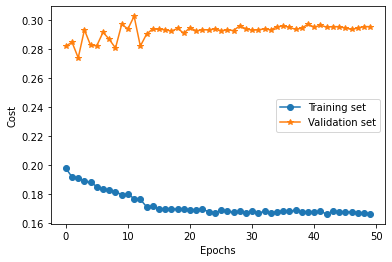

In [27]:
# Plot results
plt.plot(history.epoch, history.history['loss'], '-o')
plt.plot(history.epoch, history.history['val_loss'], '-*')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend(['Training set', 'Validation set'])
local = 'E:/Usuários/Sarah/Documentos/UTFPR/TCC/Resultados/Teste Batch/lteste_64_50'
plt.savefig(local)
plt.show()

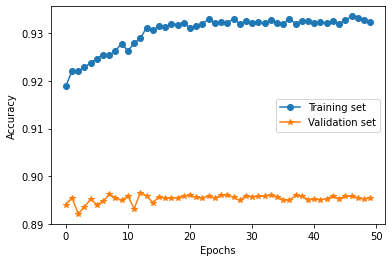

In [28]:
plt.plot(history.epoch, history.history['accuracy'], '-o')
plt.plot(history.epoch, history.history['val_accuracy'], '-*')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training set', 'Validation set'])
local = 'E:/Usuários/Sarah/Documentos/UTFPR/TCC/Resultados/Teste Batch/ateste_64_50'
plt.savefig(local)
plt.show()

In [29]:
score = model.evaluate(X_test, y_test)
print(f"Custo de teste = {score[0]:.4f}")
print(f"Acurácia de teste = {100*score[1]:.2f}%")

2055/2055 [==============================] - 2s 1ms/sample - loss: 0.2954 - accuracy: 0.8955
Custo de teste = 0.2954
Acurácia de teste = 89.55%


In [30]:
#Prediction of the model
prediction = model.predict(X_test) #Realiza a predição das probabilidades de cada label
prediction_bin = np.array(prediction)

In [31]:
prediction_bin = (prediction > 0.5).astype('int')

print(f'Prediction: {prediction_bin[67]} \t\tReal Label: {y_test[67]}')

Prediction: [0 0 0 1 1] 		Real Label: [0 0 0 1 1]


In [32]:
#List with the labels strings
label_string = ['NORM','MI','CD','STTC','HYP']

In [33]:
#Transform the binary vector in a list with strings (could be y_test or the predictions)
def get_strings(label_string,label_bin):
    label_bin_string = []
    for x in range(len(label_bin)):
        lst = []
        for y in range(len(label_string)):
            value = label_bin[x][y]
            if value == 1:
                lst.append(label_string[y])
        label_bin_string.append(lst)
    
    return label_bin_string

In [34]:
#Y_test string labels
y_test_string = get_strings(label_string, y_test)

#Predictions strings labels
prediction_string = get_strings(label_string, prediction_bin)

In [35]:
#Visualizing an example
index = 67
print(f'Index: {index}\n')

print(f'Diagnostic = {y_test[index]}')
print(f'Prediction = {prediction_bin[index]}\n')

print(f'Diagnostic = {y_test_string[index]}')
print(f'Prediction = {prediction_string[index]}')

Index: 67

Diagnostic = [0 0 0 1 1]
Prediction = [0 0 0 1 1]

Diagnostic = ['STTC', 'HYP']
Prediction = ['STTC', 'HYP']


In [36]:
(y_test == prediction_bin).mean()

0.8954744525547446

In [37]:
#Accuracy from the example below
acc_index = accuracy_score(y_test[index],prediction_bin[index])
print(f'Example accuracy = {100 * acc_index:.2f}%')

Example accuracy = 100.00%


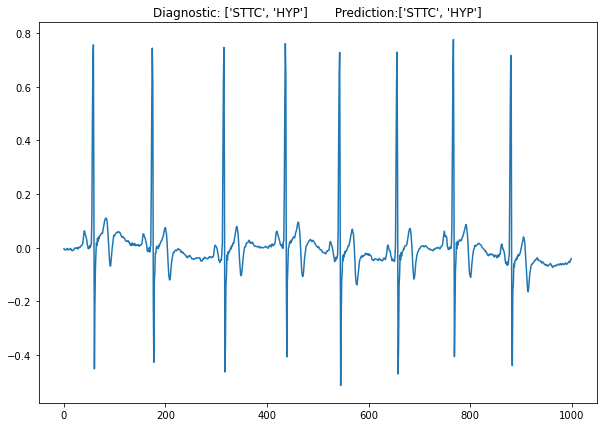

In [38]:
#Plot the example with the diagnostic and prediction
valor_med = X_test[index, ].mean(axis=-1)
fig_s, ax_s = plt.subplots(figsize=(10,7))
ax_s.set_title(f'Diagnostic: {y_test_string[index]}       Prediction:{prediction_string[index]}')
ax_s.plot(valor_med)
plt.show()

In [39]:
#Another metrics
report = classification_report(y_test,prediction_bin,output_dict=True,target_names=['NORM', 'MI', 'CD', 'STTC', 'HYP'])

report_df = pd.DataFrame.from_dict(report, orient='index')
report_df

C:\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
NORM,0.836414,0.947644,0.888562,955
MI,0.801887,0.611511,0.693878,417
CD,0.806897,0.704819,0.752412,498
STTC,0.796258,0.753937,0.774520,508
HYP,0.700730,0.430493,0.533333,223
micro avg,0.811252,0.765090,0.787495,2601
macro avg,0.788437,0.689681,0.728541,2601
weighted avg,0.805751,0.765090,0.778552,2601
samples avg,0.815491,0.798946,0.792133,2601


In [23]:
# Verificar como normalizar usando `sample_weight`:
# https://keras.io/api/models/model_training_apis/#fit-method
y_train.mean(axis=0)


array([0.46284998, 0.20307223, 0.23978647, 0.24975488, 0.11117769])

C:\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


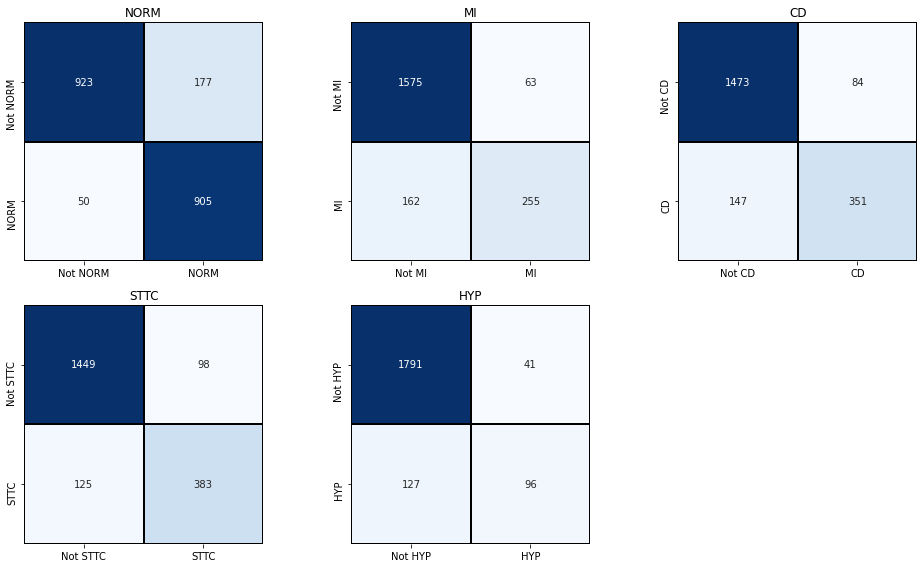

In [40]:
#Confusion marix
cm = multilabel_confusion_matrix(y_test, prediction_bin)

# https://www.kaggle.com/code/trolukovich/multi-label-classification-keras/notebook
# Plot confusion matrix 
fig = plt.figure(figsize = (14, 8))
for i, (label, matrix) in enumerate(zip(label_string, cm)):
    plt.subplot(f'23{i+1}')
    labels = [f'Not {label}', label]
    sns.heatmap(matrix, annot = True, square = True, fmt = 'd', cbar = False, cmap = 'Blues', 
                xticklabels = labels, yticklabels = labels, linecolor = 'black', linewidth = 1)
    plt.title(label)  
plt.tight_layout()
# local = 'E:/Usuários/Sarah/Documentos/UTFPR/TCC/Resultados/Teste Batch/CM_batch64_50'
# plt.savefig(local)
plt.show()

In [ ]:
ind = 23
y_test[ind,], y_bin[ind,]

In [ ]:
np.where(y_test[67,] == 1)[0]
np.where(y_bin[67,] == 1)[0]
